In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
X = df.iloc[:,2:4].values
y = df.iloc[:,4].values

### Train test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

### Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc_X = MinMaxScaler(feature_range=(0, 1))

In [9]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [10]:
print(X_train,"\n-------------------------------\n",X_test)

[[0.61904762 0.17777778]
 [0.33333333 0.77777778]
 [0.47619048 0.25925926]
 [0.33333333 0.88888889]
 [0.80952381 0.04444444]
 [0.83333333 0.65925926]
 [0.5        0.2       ]
 [0.47619048 0.34074074]
 [0.42857143 0.25925926]
 [0.42857143 0.35555556]
 [0.4047619  0.07407407]
 [0.4047619  0.25925926]
 [0.57142857 0.42962963]
 [0.69047619 0.25185185]
 [0.97619048 0.1037037 ]
 [0.73809524 0.37037037]
 [0.64285714 0.85925926]
 [0.30952381 0.54814815]
 [0.66666667 0.4962963 ]
 [0.69047619 0.26666667]
 [0.19047619 0.        ]
 [1.         0.64444444]
 [0.47619048 0.71851852]
 [0.52380952 0.68148148]
 [0.57142857 0.28148148]
 [0.4047619  0.32592593]
 [0.71428571 0.19259259]
 [0.71428571 0.88148148]
 [0.47619048 0.72592593]
 [0.26190476 0.98518519]
 [0.19047619 0.        ]
 [1.         0.2       ]
 [0.14285714 0.02962963]
 [0.57142857 0.99259259]
 [0.66666667 0.6       ]
 [0.23809524 0.32592593]
 [0.5        0.6       ]
 [0.23809524 0.54814815]
 [0.54761905 0.42222222]
 [0.64285714 0.08148148]


### Perceptron Model

In [11]:
class Perceptron(object):

    def __init__(self, no_of_features, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_features + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return np.where(summation>0.3,1,0)

    def fit(self, training_inputs, labels):
        i=0
        while i<= self.epochs:
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
            i=i+1

In [12]:
model = Perceptron(2,10000,0.0001)

In [13]:
model.fit(X_train,y_train)

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

### Evaluation

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 6, 26]], dtype=int64)

In [17]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
print('Accuracy = ',accuracy,'%')

Accuracy =  90.0 %


### Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


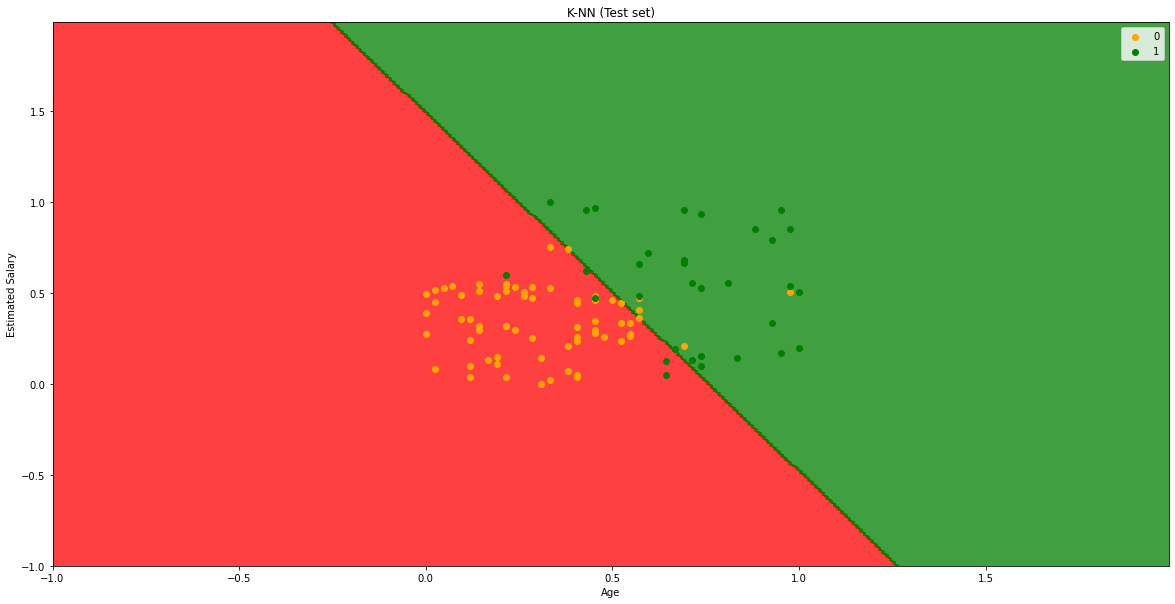

In [53]:
plt.figure(figsize=(20,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()